# Fmin optimization for hyperparameter C

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

зададим произвольную функцию y = f(x)

$$ f(x) = 1 + x + 0.9x^2 - 0.1x^3$$

In [2]:
func = lambda x:  1+ x**1+ 0.9*x**2 -0.1*x**3 

рассмотрим значения этой функции на участке [-10,15] и найдем минимум функции в точке, близкой к 0.

Optimization terminated successfully.
         Current function value: 0.737351
         Iterations: 23
         Function evaluations: 46
min value = -0.5118750000000004


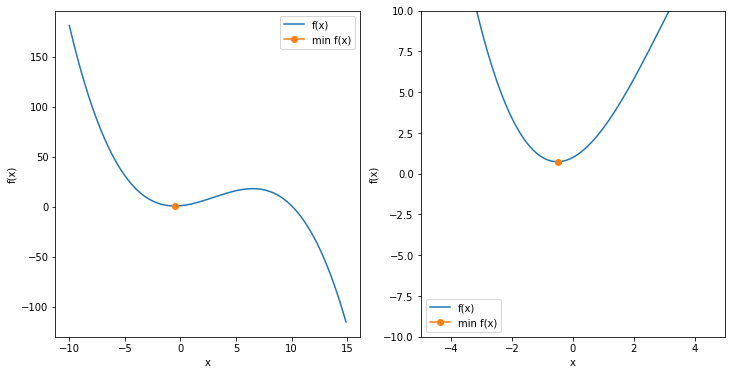

In [3]:
x = np.arange(-10,15,0.1)
y = func(x)
minimum = fmin(func, x0 = 0)
print('min value =',minimum[0])

min_point = np.argmin(np.abs(x - minimum[0])) # минимаьная точка
gridsize = (1,2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))

ax1.plot(x,y, label = 'f(x)')
ax1.plot(x[min_point],y[min_point], marker = 'o', label = 'min f(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.legend()

ax2.set_xlim(-5,5)
ax2.set_ylim(-10,10)
ax2.plot(x,y, label = 'f(x)')
ax2.plot(x[min_point],y[min_point], marker = 'o', label = 'min f(x)')

ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.legend()
plt.show()

Теперь зададим функцию y = Cos(2+x), найдем ее минимум и выведем список решений оптимизатора (fmin) на каждой итерации.

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 25
         Function evaluations: 50
min value = 1.1415625000000011


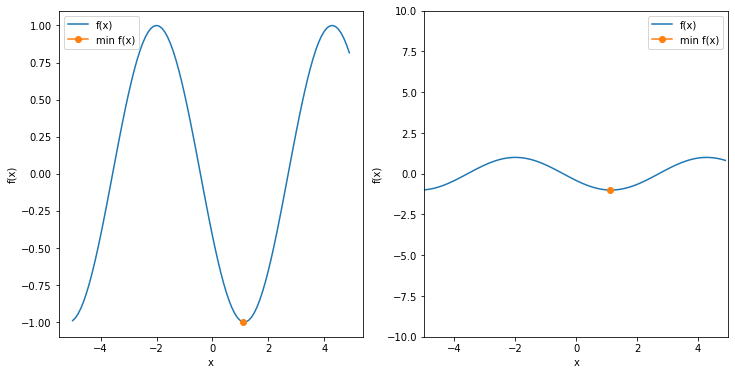

In [4]:
func2 = lambda x:  np.cos(2+x)
x = np.arange(-5,5,0.1)
y = func2(x)
minimum = fmin(func2, x0 = 0, retall= True, maxiter = 1000)
print('min value =', *minimum[0])

min_point = np.argmin(np.abs(x - minimum[0]))
gridsize = (1,2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))

ax1.plot(x,y, label = 'f(x)')
ax1.plot(x[min_point],y[min_point], marker = 'o', label = 'min f(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.legend()

ax2.set_xlim(-5,5)
ax2.set_ylim(-10,10)
ax2.plot(x,y, label = 'f(x)')
ax2.plot(x[min_point],y[min_point], marker = 'o', label = 'min f(x)')

ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.legend()
plt.show()


Выведем список решений оптимизатора (fmin) на каждой итерации.

In [5]:
minimum

(array([1.1415625]),
 [array([0.]),
  array([0.00075]),
  array([0.00175]),
  array([0.00375]),
  array([0.00775]),
  array([0.01575]),
  array([0.03175]),
  array([0.06375]),
  array([0.12775]),
  array([0.25575]),
  array([0.51175]),
  array([1.02375]),
  array([1.02375]),
  array([1.15175]),
  array([1.15175]),
  array([1.15175]),
  array([1.13575]),
  array([1.14375]),
  array([1.13975]),
  array([1.14175]),
  array([1.14175]),
  array([1.14175]),
  array([1.1415]),
  array([1.141625]),
  array([1.1415625])])

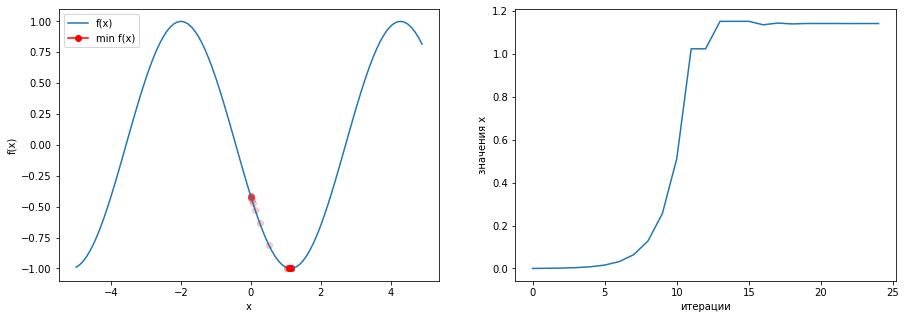

In [6]:
steps = []
for i in minimum[1:][0]:
    steps.append(i.item())
    
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))

for i in steps:
    ax1.plot(i,func2(i),marker = 'o', c = 'r', alpha = 0.2)
ax1.plot(x,y, label = 'f(x)')
ax1.plot(x[min_point],y[min_point], marker = 'o', label = 'min f(x)',c = 'r')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.legend()

ax2.plot(range(25),steps)
ax2.set_xlabel('итерации')
ax2.set_ylabel('значения x')

plt.show()

Теперь сделаем то же самое, но для логистической регрессии на примере набора данных Breast Cancer, а функцию y = Cos(2+x) используем для оптимизации гиперпараметра С.

In [7]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = 0)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (426, 30)
y_train (426,)
X_test (143, 30)
y_test (143,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

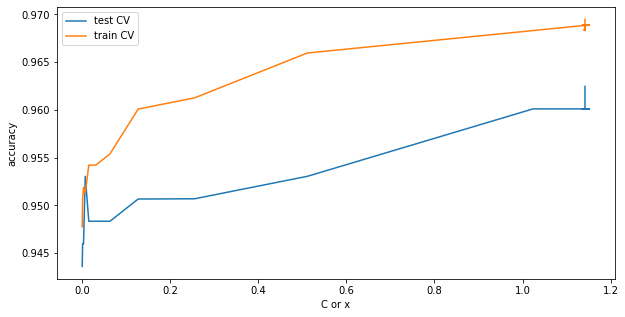

In [9]:
test_score_mean = []
train_score_mean = []
fig = plt.figure(figsize=(10, 5))
for c in steps[1:]:
    log_reg = LogisticRegression(C = c, max_iter= 4000)
    log_reg_cv = cross_validate(log_reg, X_train,y_train, return_train_score=True)
    test_score = list(log_reg_cv.items())[2][1]
    test_score_mean.append(np.mean(test_score))
    train_score = list(log_reg_cv.items())[3][1]
    train_score_mean.append(np.mean(train_score))

plt.plot(steps[1:],test_score_mean, label = 'test CV')
plt.plot(steps[1:],train_score_mean, label = 'train CV')
plt.xlabel('С or x')
plt.ylabel('accuracy')
plt.legend()
plt.show()